<img src="images/cads-logo.png" style="height: 100px;" align=left> 
<img src="images/eds.png" style="height: 100px;" align=right> 

# EDS Capstone

## Submission Guideline

1. Create a team (2-3 people)
2. Perform the following:
    1. **Data Preprocessing - Integrity Check, Exploratory Data Analysis, Cleaning
    2. **Feature Engineering**: Make new features or change the current features
    3. **Feature Selection**: Choose the best features
    4. **Predictive Models**: Create several predictive models and tune the hyperparameters
    5. **Model Evaluation**: Compare the performance of the models
    6. **Choose the Best Model**: Choose the model that has the best performance

The output expected at the end of this hackathon is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class.


All submissions are to be emailed to the trainer email address **by 3:00 pm of the last day**, indicating the names of all group members and your team name in your email.

## Presentation Guideline

**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (pandas) to clean the data (Do not clean manually using Excel)

## Objective
#### Design a predictive model to determine the potential customers. The target variable is `Potential_Customer`. 

You have been provided with information such as customers spending for last sevral years, the amount of money spent, Number of inactive months and so on.

## Data Description
- Below is the description of each feature available in the dataset
<img src="images/MicrosoftTeams-image.png" style="height: 700px">

# 1. Import necessary Packages

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import SCORERS, roc_auc_score, f1_score ## previously sklearn.metrics.scorer
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

### 2. Load the Data into Pandas Dataframe

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,...,73,3,12,16,A,0,71.0,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,...,55,6,6,22,A,1,7.0,M,U,$0.00
2,0,88003,NaN,5,12,3,5,$15.00,$15.00,$11.25,...,53,6,17,22,S,1,79.0,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,$20.00,$20.00,$12.45,...,71,8,8,33,A,0,73.0,F,U,"$76,293.00"
4,1,88056,$5.00,3,15,2,7,$3.00,$4.33,$3.80,...,63,6,12,24,S,1,68.0,F,H,"$113,663.00"


# 3. Data Integrity Check

Data Cleaning (Checking the existance of missing values, the type of variables, or integrity of data) should be done on the whole data. But EDA (checking the relationship of variables, summary of data, outliers, filling missing values etc.) should be done only on **train set** because we assume our analysis never sees the test set. However, if for instance we decide to fill missing values in one variable with specific number as the result of EDA on train set, then all missing values in both train and test will be filled with than value.

**Attention:**
> Be careful about information leakage from test set!

## 3.1. How big is the data? (number of rows, features and their types)

In [3]:
# Check the shape of data
data.shape

(4469, 25)

In [4]:
# Check the summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

### 3.1.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`?
#### 3.1.1.1 Remove the dollar sign and comma from data

**Hint:** You can use `df.col=df.col.str.replace('OldSign', 'NewSign')` 

**Example:** `data.Cust_Last_Purchase=data.Cust_Last_Purchase.str.replace('$', '')`

In [5]:
data.dtypes

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase           object
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                   object
Pur_3_years_Avg              object
Pur_5_years_Avg              object
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income              object
dtype: object

In [6]:
# Remove dollar sign and comma from data

data = data.replace({'\$':''}, regex = True)
data = data.replace({'\,':''}, regex = True)

data.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.00,2,17,2,4,0.00,7.50,7.76,...,73,3,12,16,A,0,71.0,F,H,65957.00
1,1,87939,30.00,1,7,0,3,25.00,25.00,13.00,...,55,6,6,22,A,1,7.0,M,U,0.00
2,0,88003,NaN,5,12,3,5,15.00,15.00,11.25,...,53,6,17,22,S,1,79.0,F,U,0.00
3,1,188721,20.00,1,11,0,3,20.00,20.00,12.45,...,71,8,8,33,A,0,73.0,F,U,76293.00
4,1,88056,5.00,3,15,2,7,3.00,4.33,3.80,...,63,6,12,24,S,1,68.0,F,H,113663.00


In [7]:
# Another method
"""

# Create the list name cols, containt the column that we want to modify
cols = ['Potential_Customer','Pur_latest', 'Pur_3_years_Avg','Cust_Last_Purchase', 'Pur_5_years_Avg', 'Pur_3_years_Avg_Indirect','Cust_Ann_Income']

for i in cols:
    # Remove $
    data[i] = data[i].str.replace('$', '')
    
    # Remove ,
    data[i] = data[i].str.replace(',', '')
"""

"\n\n# Create the list name cols, containt the column that we want to modify\ncols = ['Potential_Customer','Pur_latest', 'Pur_3_years_Avg','Cust_Last_Purchase', 'Pur_5_years_Avg', 'Pur_3_years_Avg_Indirect','Cust_Ann_Income']\n\nfor i in cols:\n    # Remove $\n    data[i] = data[i].str.replace('$', '')\n    \n    # Remove ,\n    data[i] = data[i].str.replace(',', '')\n"

## 3.2. Check data for duplicate rows

In [8]:
def check_duplicate(d,c):
    if len(d[c])>len(set(d[c])):
        print('Data has duplicate')
    else:
        print('Data does not have duplicate')

check_duplicate(data, 'C_ID')

Data has duplicate


In [9]:
# Check the amount of duplicate data
data[data.duplicated()].count()

Potential_Customer          851
C_ID                        851
Cust_Last_Purchase          413
Pur_3_years                 851
Pur_5_years                 851
Pur_3_years_Indirect        851
Pur_5_years_Indirect        851
Pur_latest                  851
Pur_3_years_Avg             851
Pur_5_years_Avg             851
Pur_3_years_Avg_Indirect    686
InAct_Last                  851
InAct_First                 851
Ad_Res_1_year               851
Ad_Res_3_Year               851
Ad_Res_5_Year               851
Ad_Res_Ind_1_Year           851
Ad_Res_Ind_3_Year           851
Ad_Res_Ind_5_Year           851
Status_Cust                 851
Status_Latest_Ad            851
Age                         685
Gender                      851
Cust_Prop                   851
Cust_Ann_Income             851
dtype: int64

### 3.2.1 Remove duplicate rows
**Hint:** Use `df=df.drop_duplicates()`

In [10]:
# Removing duplicated data
data = data.drop_duplicates()

In [11]:
# Check the size of dataframe after removing duplicated data
data.shape

(3618, 25)

## 3.3. Do we need `C_ID` in our analysis?


In [12]:
# No, we doesn't need this column because it contain only ID

# Dropping the C_ID column
data.drop(['C_ID'], axis = 1, inplace = True) # Use inplace = True, to delete permanently the C_ID column from original dataframe

In [13]:
# check if the C_ID column had been removed
data.head()

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,5.00,2,17,2,4,0.00,7.50,7.76,7.50,...,73,3,12,16,A,0,71.0,F,H,65957.00
1,1,30.00,1,7,0,3,25.00,25.00,13.00,NaN,...,55,6,6,22,A,1,7.0,M,U,0.00
2,0,NaN,5,12,3,5,15.00,15.00,11.25,14.67,...,53,6,17,22,S,1,79.0,F,U,0.00
3,1,20.00,1,11,0,3,20.00,20.00,12.45,NaN,...,71,8,8,33,A,0,73.0,F,U,76293.00
4,1,5.00,3,15,2,7,3.00,4.33,3.80,4.00,...,63,6,12,24,S,1,68.0,F,H,113663.00


## 3.4. Check if the column types are accurate? if not fix them

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        3618 non-null   int64  
 1   Cust_Last_Purchase        1736 non-null   object 
 2   Pur_3_years               3618 non-null   int64  
 3   Pur_5_years               3618 non-null   int64  
 4   Pur_3_years_Indirect      3618 non-null   int64  
 5   Pur_5_years_Indirect      3618 non-null   int64  
 6   Pur_latest                3618 non-null   object 
 7   Pur_3_years_Avg           3618 non-null   object 
 8   Pur_5_years_Avg           3618 non-null   object 
 9   Pur_3_years_Avg_Indirect  2956 non-null   object 
 10  InAct_Last                3618 non-null   int64  
 11  InAct_First               3618 non-null   int64  
 12  Ad_Res_1_year             3618 non-null   int64  
 13  Ad_Res_3_Year             3618 non-null   int64  
 14  Ad_Res_5

In [15]:
CatCols=['Potential_Customer','Status_Cust', 'Status_Latest_Ad',
         'Gender', 'Cust_Prop']
NumCols=list(set(data.columns)-set(CatCols))

In [16]:
# Fix the column type
data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))
data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))

In [17]:
# Another method
"""
data[NumCols]=data[NumCols].astype('float')
data[CatCols]=data[CatCols].astype('category')
"""

"\ndata[NumCols]=data[NumCols].astype('float')\ndata[CatCols]=data[CatCols].astype('category')\n"

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        3618 non-null   category
 1   Cust_Last_Purchase        1736 non-null   float64 
 2   Pur_3_years               3618 non-null   float64 
 3   Pur_5_years               3618 non-null   float64 
 4   Pur_3_years_Indirect      3618 non-null   float64 
 5   Pur_5_years_Indirect      3618 non-null   float64 
 6   Pur_latest                3618 non-null   float64 
 7   Pur_3_years_Avg           3618 non-null   float64 
 8   Pur_5_years_Avg           3618 non-null   float64 
 9   Pur_3_years_Avg_Indirect  2956 non-null   float64 
 10  InAct_Last                3618 non-null   float64 
 11  InAct_First               3618 non-null   float64 
 12  Ad_Res_1_year             3618 non-null   float64 
 13  Ad_Res_3_Year             3618 non-null   float6

# 4. Split data to train/test 

Split the data into 75/25 train/test set. Use random_state=42 and stratify=y

In [19]:
# Create X and y variable
X = data.drop('Potential_Customer', axis = 1)
y = data['Potential_Customer']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

# 5. Exploratory Data Analysis (EDA)

## 5.1. Explore Categorical Variables

In [21]:
categorical = ['Status_Cust','Status_Latest_Ad','Gender','Cust_Prop']
X_train[categorical].head()

,Status_Cust,Status_Latest_Ad,Gender,Cust_Prop
3151,S,1,F,U
1698,S,1,F,H
2327,A,0,M,H
721,A,1,F,H
811,S,1,M,H


In [22]:
# Check the category data in more details
X_train.describe(include = 'category')

,Status_Cust,Status_Latest_Ad,Gender,Cust_Prop
count,2713,2713,2713,2713
unique,6,2,3,2
top,A,1,F,H
freq,1635,1528,1462,1503


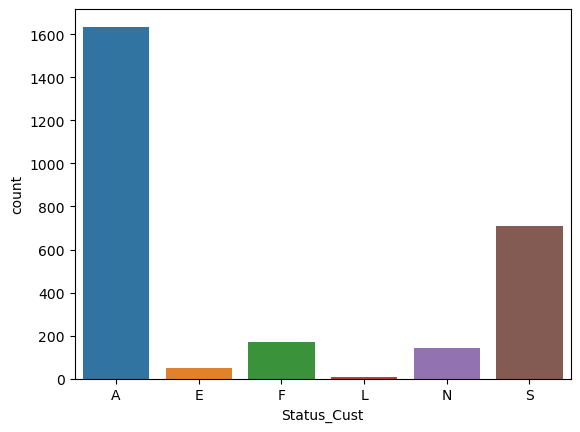

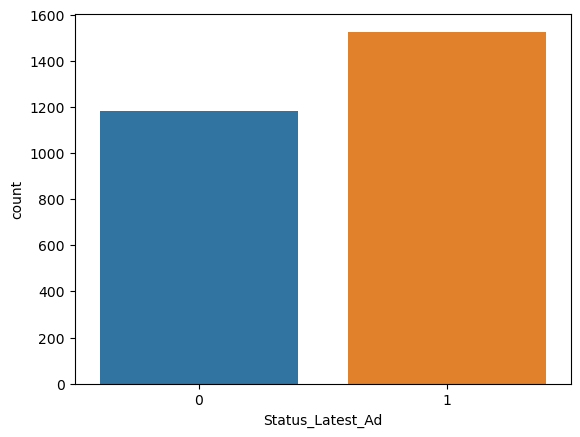

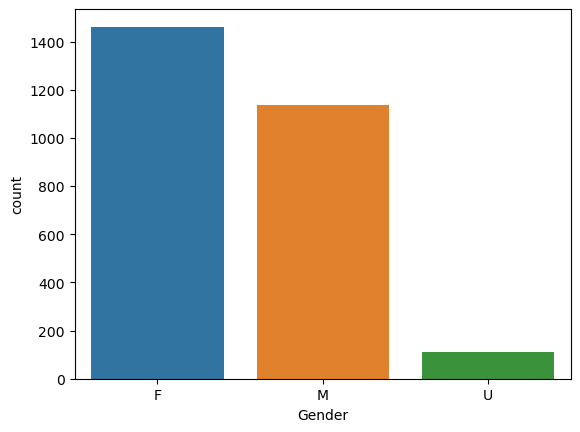

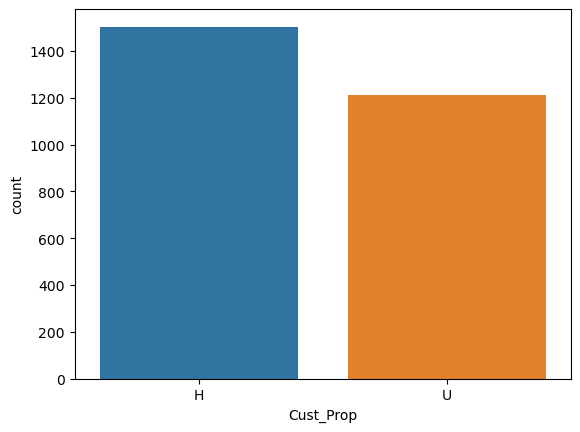

In [23]:
# Visualisation

for i,x in enumerate(X_train[categorical]):
    plt.figure(i)
    ax = sns.countplot(x = x, data = X_train)

## 5.2. Explore Relationship Between Categorical & Target Variable

In [24]:
# Combined the data of X_train with y_train. Because we only want to use the training data for EDA
combined_trainset = X_train.join(y_train)

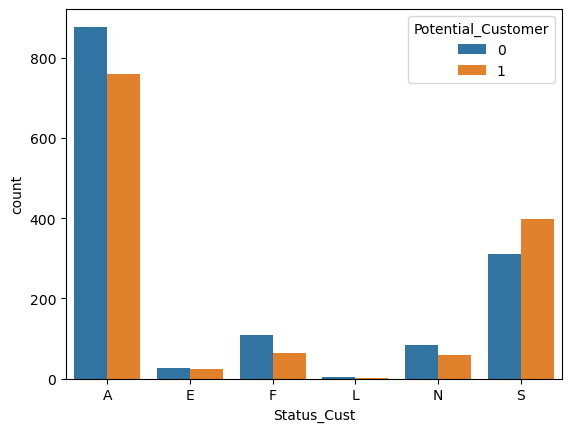

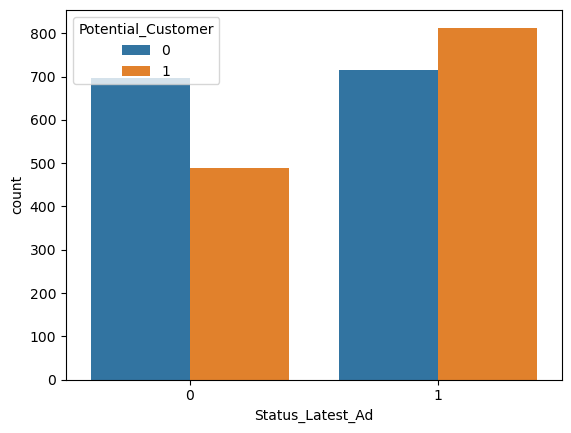

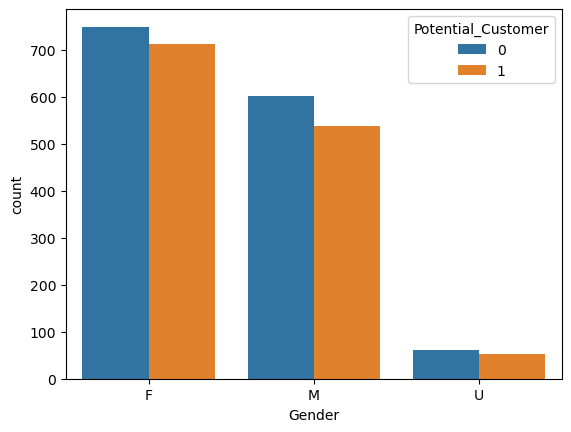

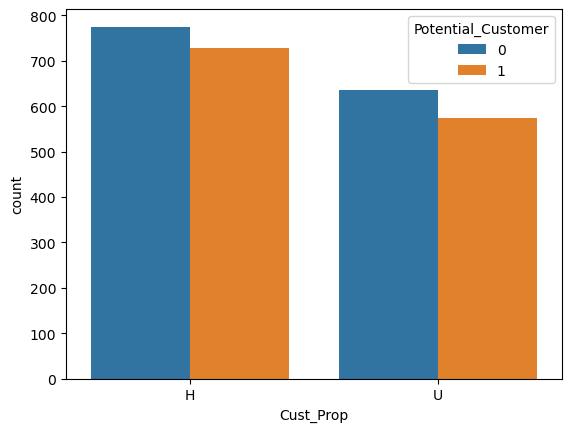

In [25]:
categorical = ['Status_Cust','Status_Latest_Ad','Gender','Cust_Prop']

for i in combined_trainset[categorical]:
    sns.countplot(data = combined_trainset, x = i, hue = 'Potential_Customer')
    plt.show()

### 5.2.1 Insight

- Most active buyer and star buyer having the highest percentage of being a potential customer. Thus they have high probability for being a potential customer
- Inactive buyer, new buyer, first time buyer and lapsing buyer show insignificant value. 

### 5.2.2 Solution

- Inactive buyer, new buyer, first time buyer and lapsing buyer being combine into new columns called 'others'
- Increase the promotional sale for the active buyer and the star buyer in order to increase profits, as these two buyers contribute significantly to the property sale.

In [26]:
# Create new columns 'Others' to combine all the buyer data that have insignificant values
new_dict = {'A':'A','S':'S','E':'Others','F':'Others','N':'Others','L':'Others'}
combined_trainset['Status_Cust_New'] = combined_trainset['Status_Cust'].replace(new_dict)
combined_trainset['Status_Cust_New'].unique()

array(['S', 'A', 'Others'], dtype=object)

In [27]:
# Change the dtype of column Status_Cust_New to category
combined_trainset['Status_Cust_New'] = combined_trainset['Status_Cust_New'].astype('category')


In [28]:
combined_trainset.dtypes

Cust_Last_Purchase           float64
Pur_3_years                  float64
Pur_5_years                  float64
Pur_3_years_Indirect         float64
Pur_5_years_Indirect         float64
Pur_latest                   float64
Pur_3_years_Avg              float64
Pur_5_years_Avg              float64
Pur_3_years_Avg_Indirect     float64
InAct_Last                   float64
InAct_First                  float64
Ad_Res_1_year                float64
Ad_Res_3_Year                float64
Ad_Res_5_Year                float64
Ad_Res_Ind_1_Year            float64
Ad_Res_Ind_3_Year            float64
Ad_Res_Ind_5_Year            float64
Status_Cust                 category
Status_Latest_Ad            category
Age                          float64
Gender                      category
Cust_Prop                   category
Cust_Ann_Income              float64
Potential_Customer          category
Status_Cust_New             category
dtype: object

## 5.3. Explore Numerical Variables

array([[<AxesSubplot:title={'center':'InAct_First'}>,
        <AxesSubplot:title={'center':'Ad_Res_5_Year'}>,
        <AxesSubplot:title={'center':'Pur_3_years_Avg_Indirect'}>,
        <AxesSubplot:title={'center':'Pur_3_years_Indirect'}>],
       [<AxesSubplot:title={'center':'Ad_Res_Ind_1_Year'}>,
        <AxesSubplot:title={'center':'Pur_3_years'}>,
        <AxesSubplot:title={'center':'Ad_Res_Ind_3_Year'}>,
        <AxesSubplot:title={'center':'Ad_Res_3_Year'}>],
       [<AxesSubplot:title={'center':'Cust_Last_Purchase'}>,
        <AxesSubplot:title={'center':'Cust_Ann_Income'}>,
        <AxesSubplot:title={'center':'Ad_Res_Ind_5_Year'}>,
        <AxesSubplot:title={'center':'Pur_5_years_Indirect'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Pur_5_years_Avg'}>,
        <AxesSubplot:title={'center':'InAct_Last'}>,
        <AxesSubplot:title={'center':'Ad_Res_1_year'}>],
       [<AxesSubplot:title={'center':'Pur_5_years'}>,
        <AxesSubp

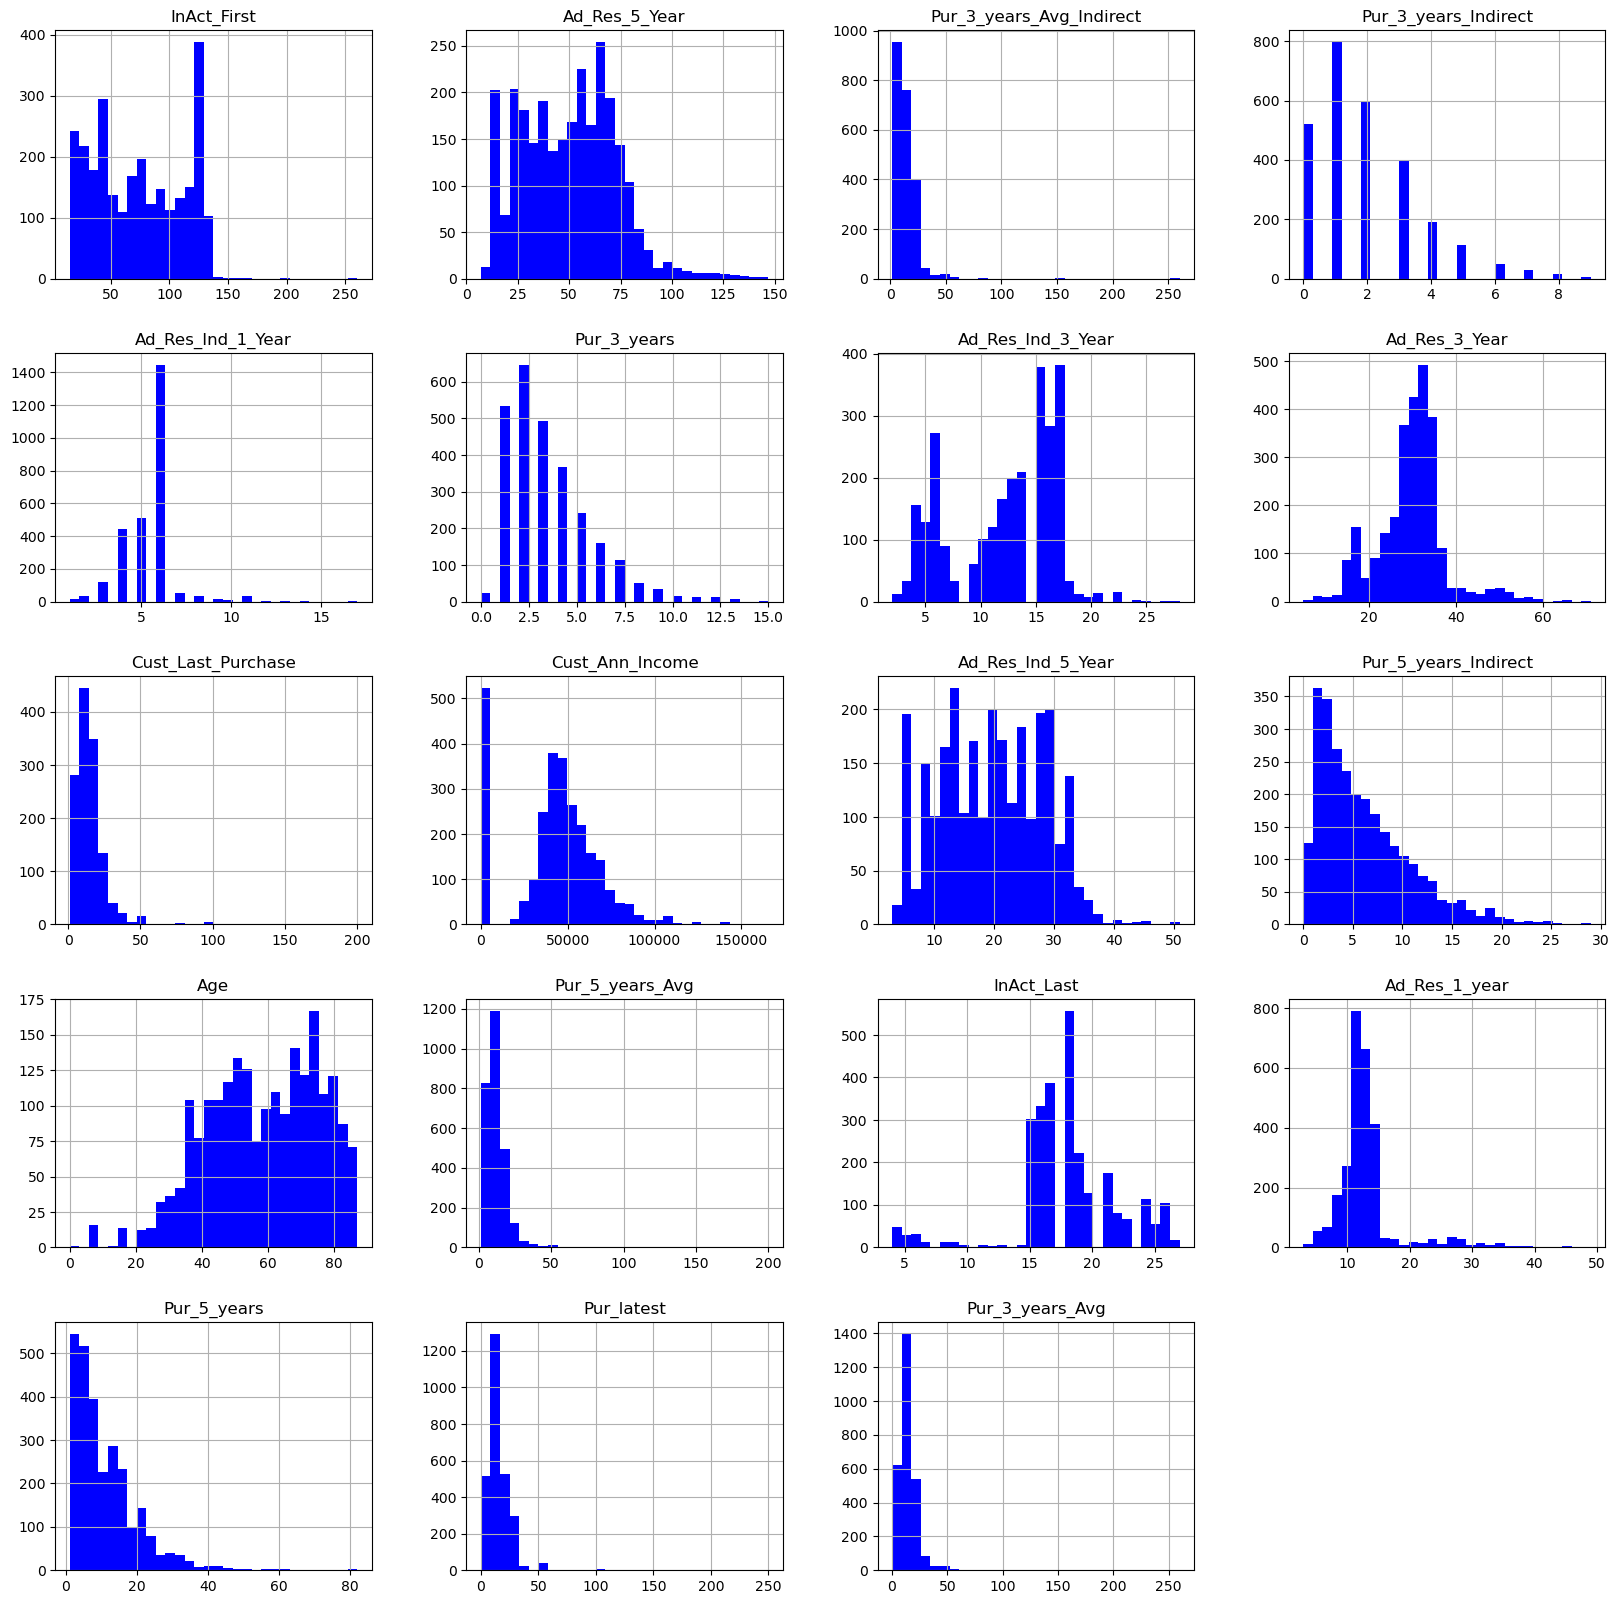

In [29]:
# Histogram of Numerical Variabless for Train Set Data
combined_trainset[NumCols].hist(bins = 30, figsize =(20, 20), color = 'b')

In [30]:
# Check the column with numerical variables
combined_trainset[NumCols].dtypes

InAct_First                 float64
Ad_Res_5_Year               float64
Pur_3_years_Avg_Indirect    float64
Pur_3_years_Indirect        float64
Ad_Res_Ind_1_Year           float64
Pur_3_years                 float64
Ad_Res_Ind_3_Year           float64
Ad_Res_3_Year               float64
Cust_Last_Purchase          float64
Cust_Ann_Income             float64
Ad_Res_Ind_5_Year           float64
Pur_5_years_Indirect        float64
Age                         float64
Pur_5_years_Avg             float64
InAct_Last                  float64
Ad_Res_1_year               float64
Pur_5_years                 float64
Pur_latest                  float64
Pur_3_years_Avg             float64
dtype: object

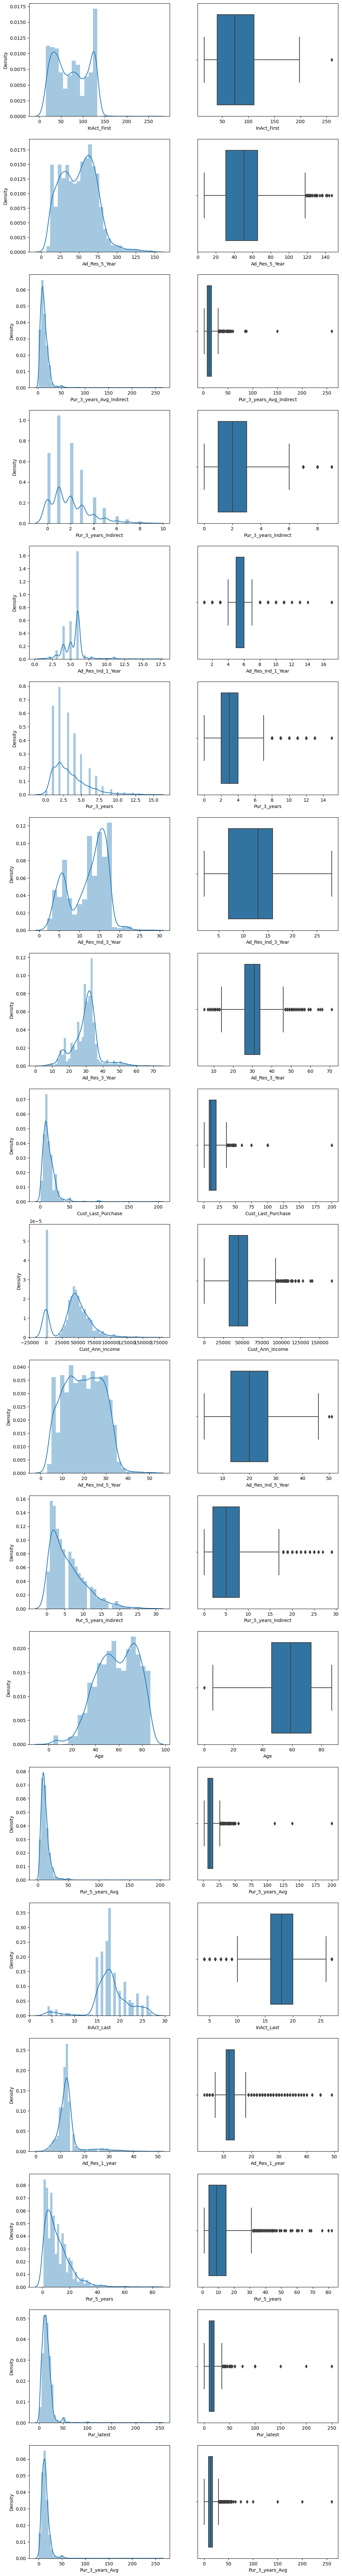

In [31]:
fig, ax = plt.subplots(nrows = len(NumCols), ncols = 2, figsize = (12, 100))
for a in range(len(NumCols)):
    sns.distplot(combined_trainset[NumCols[a]], ax = ax[a,0])
    sns.boxplot(combined_trainset[NumCols[a]], ax = ax[a,1])

In [32]:
# Import skew library
from scipy.stats import skew

# Check the skewness
combined_trainset[NumCols].skew()


InAct_First                 0.144129
Ad_Res_5_Year               0.405584
Pur_3_years_Avg_Indirect    8.952631
Pur_3_years_Indirect        1.131775
Ad_Res_Ind_1_Year           1.118947
Pur_3_years                 1.331399
Ad_Res_Ind_3_Year          -0.431024
Ad_Res_3_Year               0.353871
Cust_Last_Purchase          5.332429
Cust_Ann_Income            -0.046891
Ad_Res_Ind_5_Year           0.064363
Pur_5_years_Indirect        1.247993
Age                        -0.369449
Pur_5_years_Avg             7.265961
InAct_Last                 -0.825498
Ad_Res_1_year               2.763937
Pur_5_years                 1.967836
Pur_latest                  7.276390
Pur_3_years_Avg             8.667926
dtype: float64

### 5.3.1 Insight

The majority of the skew for all of the data is to the right. Therefore, the numerical features do not demonstrate a normal distribution.
In brief, there will be an excess of outliers.

### 5.3.2 Handling Missing Values

In [33]:
# Check for missing values

combined_trainset.isnull().sum()

Cust_Last_Purchase          1411
Pur_3_years                    0
Pur_5_years                    0
Pur_3_years_Indirect           0
Pur_5_years_Indirect           0
Pur_latest                     0
Pur_3_years_Avg                0
Pur_5_years_Avg                0
Pur_3_years_Avg_Indirect     520
InAct_Last                     0
InAct_First                    0
Ad_Res_1_year                  0
Ad_Res_3_Year                  0
Ad_Res_5_Year                  0
Ad_Res_Ind_1_Year              0
Ad_Res_Ind_3_Year              0
Ad_Res_Ind_5_Year              0
Status_Cust                    0
Status_Latest_Ad               0
Age                          585
Gender                         0
Cust_Prop                      0
Cust_Ann_Income                0
Potential_Customer             0
Status_Cust_New                0
dtype: int64

In [34]:
# Check the total number of row / columns of data
combined_trainset.shape

(2713, 25)

#### 5.3.2.1 Cust_Last_Purchase

In [35]:
# Number of missing values for Cust_Last_Purchase
missing_values = combined_trainset['Cust_Last_Purchase'].isnull().sum()

# Percentage % missing values for Cust_Last_Purchase
# 2731 is total number of rows for training set
percentage_missing_values = (missing_values / 2713 ) * 100

print("Percentage of missing values for Cust_Last_Purchase : {:.2f}".format(percentage_missing_values), '%') 




Percentage of missing values for Cust_Last_Purchase : 52.01 %


In [36]:
# Since the percentage of missing values are more than half, we decide to drop this column
combined_trainset = combined_trainset.drop('Cust_Last_Purchase', axis = 1)

##### 5.3.2.2 Pur_3_years_Avg_Indirect

In [37]:
# Replace missing values with median because most of the data contain outliers

Pur_3_years_Avg_indirect_med=combined_trainset['Pur_3_years_Avg_Indirect'].median()
print("Median : ",Pur_3_years_Avg_indirect_med)

combined_trainset['Pur_3_years_Avg_Indirect'] = combined_trainset['Pur_3_years_Avg_Indirect'].fillna(combined_trainset['Pur_3_years_Avg_Indirect'].median())

Median :  11.88


#### 5.3.2.3. Age 

In [38]:
# Median of column Age
Age_median = combined_trainset['Age'].median()
Age_median

59.0

In [39]:
# Replace NaN/missing values with 0
combined_trainset['Age'] = combined_trainset['Age'].fillna(0)

In [40]:
# Replace the Age data for those under the age of 18 with the median
combined_trainset.loc[combined_trainset['Age'] < 18,'Age'] = combined_trainset['Age'].median()

#### 5.3.2.4. Cust_Ann_Income 

In [41]:
# Median
Cust_Ann_Income_median = combined_trainset['Cust_Ann_Income'].median()
Cust_Ann_Income_median

44756.0

- Numerous values in the Cust Ann Income column indicate that the annual income of the customer is zero.

- It makes no sense for the data to be empty. Therefore, replace the value 0 with the column's median value

In [42]:

combined_trainset['Cust_Ann_Income'] = combined_trainset['Cust_Ann_Income'].replace(0, Cust_Ann_Income_median)

<AxesSubplot:xlabel='Cust_Ann_Income', ylabel='Density'>

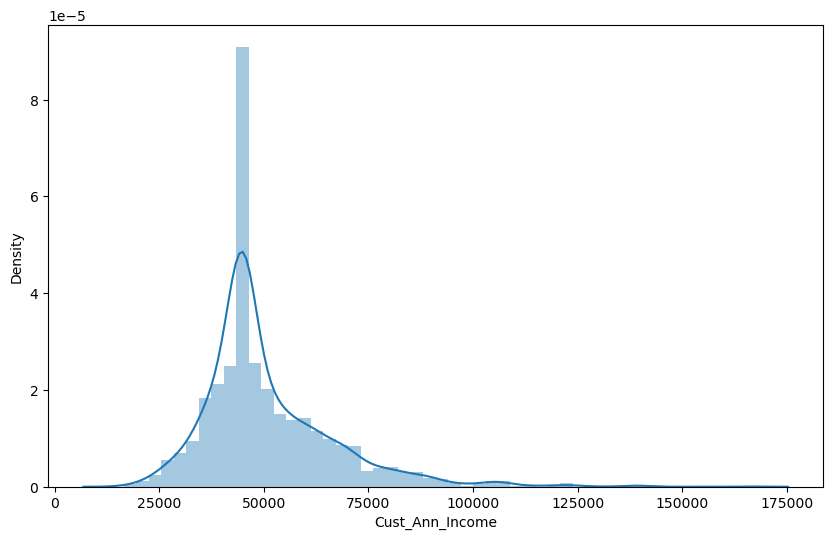

In [43]:
# Check the plot of this column
fig, ax = plt.subplots(figsize = (10,6))
sns.distplot(combined_trainset['Cust_Ann_Income'])

# 6. Feature Engineering: 


## 6.1. Add Some High Level Features
Sometimes we can use high level features that reflect the interactions between the columns as new features to get better insight and feed more information to our predictive models. Also transformation of some columns can be better options to be fed to the models. For instance, instead of a numerical column, you can use log of the column, square of the column, or any other transformation of the column. The type of interaction, or transformation you should choose, can be defined after Exploratory data analysis or just business insight.

Example: Instead of two variables for the number of purchase, and the average amount of purchase, we could calculate the total amount of purchase for the customers.

In [44]:
# Square root all the data

# Change of plan, did not use this square root 
"""
combined_trainset["Pur_5_years_Total"] = combined_trainset['Pur_5_years'] * combined_trainset['Pur_5_years_Avg']

combined_trainset['Ad_Res_Rate_3_years']=combined_trainset['Pur_3_years']/(combined_trainset['Ad_Res_3_Year']+combined_trainset['Ad_Res_Ind_3_Year']+1)

combined_trainset['sqrt_Pur_3_years_Indirect']=np.sqrt(combined_trainset['Pur_3_years_Indirect'])
combined_trainset['sqrt_Pur_latest']=np.sqrt(combined_trainset['Pur_latest'])
combined_trainset['sqrt_Pur_3_years']=np.sqrt(combined_trainset['Pur_3_years'])
combined_trainset['sqrt_Pur_3_years_Avg_Indirect']=np.sqrt(combined_trainset['Pur_3_years_Avg_Indirect'])
combined_trainset['sqrt_Pur_5_years_Indirect']=np.sqrt(combined_trainset['Pur_5_years_Indirect'])
combined_trainset['sqrt_Pur_3_years_Avg']=np.sqrt(combined_trainset['Pur_3_years_Avg'])
combined_trainset['sqrt_Pur_5_years']=np.sqrt(combined_trainset['Pur_5_years'])
combined_trainset['sqrt_Ad_Res_Rate_3_years']=np.sqrt(combined_trainset['Ad_Res_Rate_3_years'])
combined_trainset['sqrt_Pur_5_years_Total']=np.sqrt(combined_trainset['Pur_5_years_Total'])
combined_trainset['sqrt_Pur_3_years_Total']=np.sqrt(combined_trainset['Pur_3_years_Total'])
"""




'\ncombined_trainset["Pur_5_years_Total"] = combined_trainset[\'Pur_5_years\'] * combined_trainset[\'Pur_5_years_Avg\']\n\ncombined_trainset[\'Ad_Res_Rate_3_years\']=combined_trainset[\'Pur_3_years\']/(combined_trainset[\'Ad_Res_3_Year\']+combined_trainset[\'Ad_Res_Ind_3_Year\']+1)\n\ncombined_trainset[\'sqrt_Pur_3_years_Indirect\']=np.sqrt(combined_trainset[\'Pur_3_years_Indirect\'])\ncombined_trainset[\'sqrt_Pur_latest\']=np.sqrt(combined_trainset[\'Pur_latest\'])\ncombined_trainset[\'sqrt_Pur_3_years\']=np.sqrt(combined_trainset[\'Pur_3_years\'])\ncombined_trainset[\'sqrt_Pur_3_years_Avg_Indirect\']=np.sqrt(combined_trainset[\'Pur_3_years_Avg_Indirect\'])\ncombined_trainset[\'sqrt_Pur_5_years_Indirect\']=np.sqrt(combined_trainset[\'Pur_5_years_Indirect\'])\ncombined_trainset[\'sqrt_Pur_3_years_Avg\']=np.sqrt(combined_trainset[\'Pur_3_years_Avg\'])\ncombined_trainset[\'sqrt_Pur_5_years\']=np.sqrt(combined_trainset[\'Pur_5_years\'])\ncombined_trainset[\'sqrt_Ad_Res_Rate_3_years\']=np.

In [45]:
# Add 3 new columns :

# Create new columns for Total Purchase by  multiplying the Purchase by year with Average purchase by year
combined_trainset["Pur_5_years_Total"] = combined_trainset['Pur_5_years'] * combined_trainset['Pur_5_years_Avg']
combined_trainset["Pur_3_years_Total"] = combined_trainset['Pur_3_years'] * combined_trainset['Pur_3_years_Avg']

# Create new column name Period of activity
combined_trainset['Period_Of_Active'] = combined_trainset['InAct_First'] - combined_trainset['InAct_Last']



In [46]:
combined_trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2713 entries, 3151 to 656
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pur_3_years               2713 non-null   float64 
 1   Pur_5_years               2713 non-null   float64 
 2   Pur_3_years_Indirect      2713 non-null   float64 
 3   Pur_5_years_Indirect      2713 non-null   float64 
 4   Pur_latest                2713 non-null   float64 
 5   Pur_3_years_Avg           2713 non-null   float64 
 6   Pur_5_years_Avg           2713 non-null   float64 
 7   Pur_3_years_Avg_Indirect  2713 non-null   float64 
 8   InAct_Last                2713 non-null   float64 
 9   InAct_First               2713 non-null   float64 
 10  Ad_Res_1_year             2713 non-null   float64 
 11  Ad_Res_3_Year             2713 non-null   float64 
 12  Ad_Res_5_Year             2713 non-null   float64 
 13  Ad_Res_Ind_1_Year         2713 non-null   floa

In [47]:
#combined_trainset.groupby('Potential_Customer').head()

In [48]:
# Create Categorical and Numerical variable with the column name for train set

CatCols_Train = ['Potential_Customer', 'Status_Cust', 'Status_Latest_Ad', 'Status_Cust_New', 'Gender', 'Cust_Prop']
NumCols_Train = list(set(combined_trainset.columns)-set(CatCols_Train))

## 6.2. Explore Relationship Between Numerical variables & Target Variable

array([[<AxesSubplot:title={'center':'Ad_Res_5_Year'}>,
        <AxesSubplot:title={'center':'Pur_3_years_Avg_Indirect'}>,
        <AxesSubplot:title={'center':'Ad_Res_Ind_1_Year'}>,
        <AxesSubplot:title={'center':'Ad_Res_3_Year'}>,
        <AxesSubplot:title={'center':'Ad_Res_Ind_5_Year'}>],
       [<AxesSubplot:title={'center':'Pur_5_years_Indirect'}>,
        <AxesSubplot:title={'center':'Pur_5_years_Avg'}>,
        <AxesSubplot:title={'center':'InAct_Last'}>,
        <AxesSubplot:title={'center':'Ad_Res_1_year'}>,
        <AxesSubplot:title={'center':'Pur_3_years_Avg'}>],
       [<AxesSubplot:title={'center':'InAct_First'}>,
        <AxesSubplot:title={'center':'Pur_3_years_Indirect'}>,
        <AxesSubplot:title={'center':'Pur_3_years'}>,
        <AxesSubplot:title={'center':'Ad_Res_Ind_3_Year'}>,
        <AxesSubplot:title={'center':'Cust_Ann_Income'}>],
       [<AxesSubplot:title={'center':'Period_Of_Active'}>,
        <AxesSubplot:title={'center':'Pur_3_years_Total'}>,
  

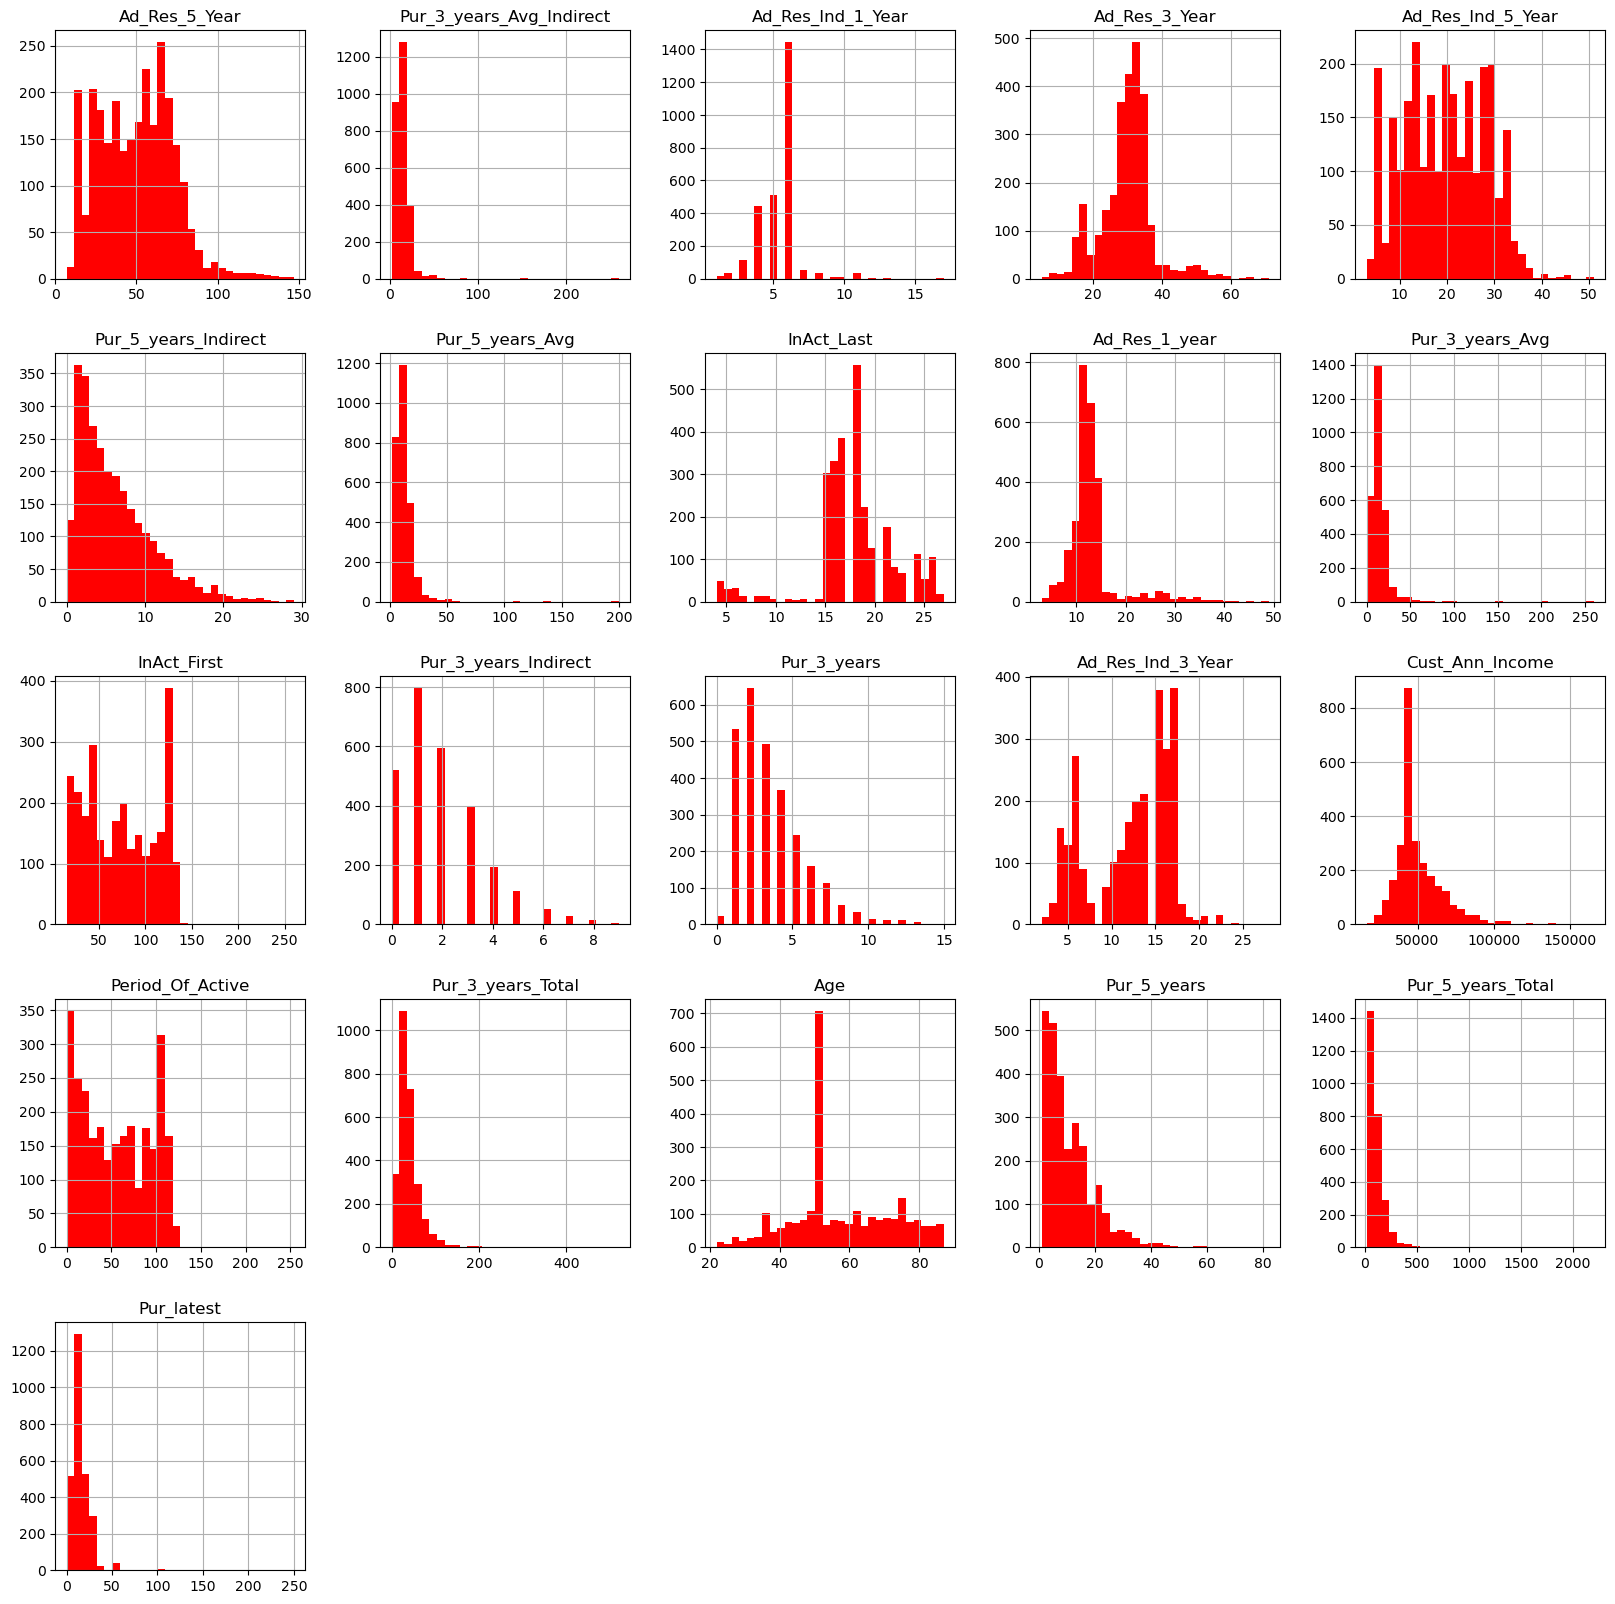

In [49]:
# Check the histogram of Numerical Variables for train set
combined_trainset[NumCols_Train].hist(bins = 30, figsize =(20, 20), color = 'r')

In [50]:
# Median for all columns, groupby 'Potential_Customer'

combined_trainset[NumCols_Train].groupby(combined_trainset['Potential_Customer']).median().T

Potential_Customer,0,1
Ad_Res_5_Year,49.00,52.000
Pur_3_years_Avg_Indirect,11.88,11.880
Ad_Res_Ind_1_Year,6.00,6.000
Ad_Res_3_Year,31.00,31.000
Ad_Res_Ind_5_Year,19.00,20.000
Pur_5_years_Indirect,4.00,5.000
Pur_5_years_Avg,11.00,9.695
InAct_Last,18.00,18.000
Ad_Res_1_year,12.00,13.000
Pur_3_years_Avg,14.50,12.000


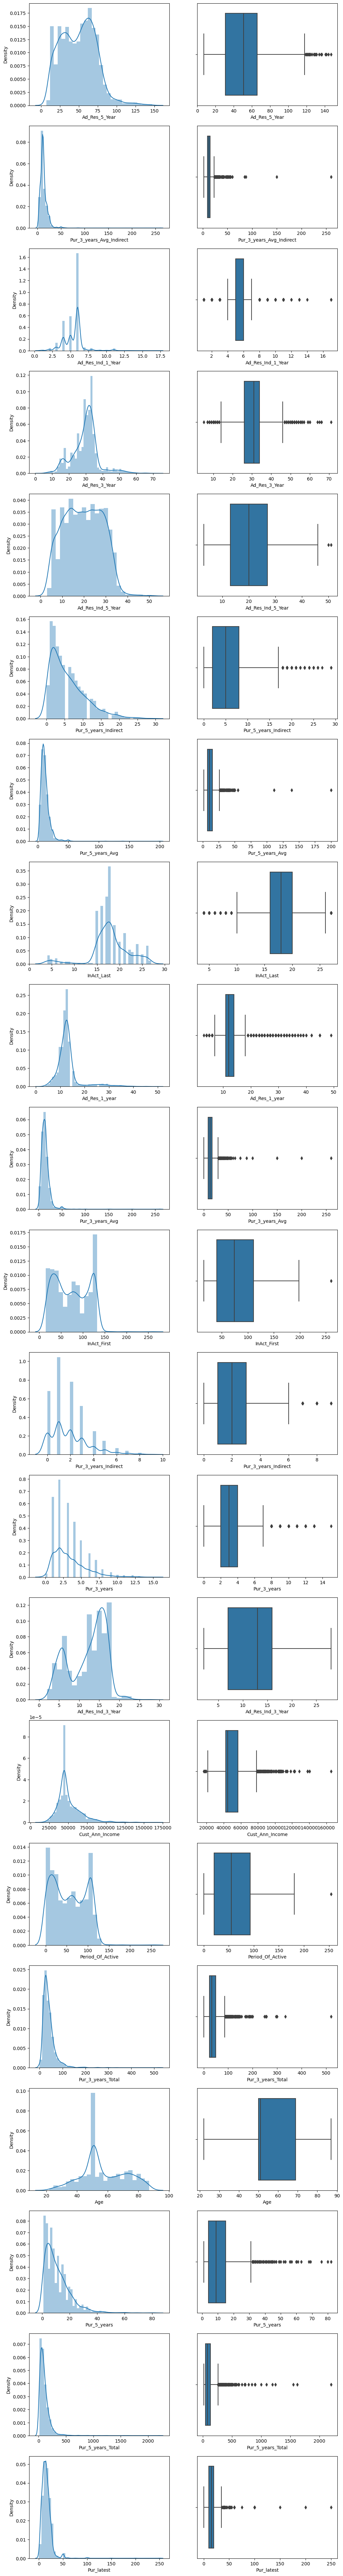

In [51]:
# Boxplo and Distribution plot for the Numerical Variable for Train Set
fig, ax = plt.subplots(nrows = len(NumCols_Train), ncols = 2, figsize = (12, 100))
for a in range(len(NumCols_Train)):
    sns.distplot(combined_trainset[NumCols_Train[a]], ax = ax[a,0])
    sns.boxplot(combined_trainset[NumCols_Train[a]], ax = ax[a,1])

In [52]:
# Check the skewness
combined_trainset[NumCols_Train].skew()

Ad_Res_5_Year               0.405584
Pur_3_years_Avg_Indirect    9.979052
Ad_Res_Ind_1_Year           1.118947
Ad_Res_3_Year               0.353871
Ad_Res_Ind_5_Year           0.064363
Pur_5_years_Indirect        1.247993
Pur_5_years_Avg             7.265961
InAct_Last                 -0.825498
Ad_Res_1_year               2.763937
Pur_3_years_Avg             8.667926
InAct_First                 0.144129
Pur_3_years_Indirect        1.131775
Pur_3_years                 1.331399
Ad_Res_Ind_3_Year          -0.431024
Cust_Ann_Income             1.703652
Period_Of_Active            0.159513
Pur_3_years_Total           4.445922
Age                         0.151703
Pur_5_years                 1.967836
Pur_5_years_Total           6.766948
Pur_latest                  7.276390
dtype: float64

In [53]:
# The median and mean of skewness of this data
print("The mean of this data skewness : {:.3f}".format(combined_trainset[NumCols_Train].skew().mean()))
print("\nThe median of this data skewness : {:.3f}".format(combined_trainset[NumCols_Train].skew().median()))

The mean of this data skewness : 2.652

The median of this data skewness : 1.248


## 6.3. Explore Correlation between Numerical Variables

In [54]:
# Check the correlation of Numerical Variables

Numerical_Correlations = combined_trainset[NumCols_Train].corr()
Numerical_Correlations

,Ad_Res_5_Year,Pur_3_years_Avg_Indirect,Ad_Res_Ind_1_Year,Ad_Res_3_Year,Ad_Res_Ind_5_Year,Pur_5_years_Indirect,Pur_5_years_Avg,InAct_Last,Ad_Res_1_year,Pur_3_years_Avg,...,Pur_3_years_Indirect,Pur_3_years,Ad_Res_Ind_3_Year,Cust_Ann_Income,Period_Of_Active,Pur_3_years_Total,Age,Pur_5_years,Pur_5_years_Total,Pur_latest
Ad_Res_5_Year,1.000000,-0.057203,0.414138,0.734913,0.944538,0.748966,-0.215119,-0.263958,0.541517,-0.072701,...,0.239577,0.309343,0.445536,-0.023301,0.866709,0.240468,0.217887,0.791099,0.642654,-0.106130
Pur_3_years_Avg_Indirect,-0.057203,1.000000,0.013845,0.023601,-0.082590,-0.196756,0.696602,0.063873,0.090834,0.816983,...,-0.194579,-0.301088,0.024097,0.086536,-0.115626,0.531218,-0.016978,-0.206826,0.262015,0.603838
Ad_Res_Ind_1_Year,0.414138,0.013845,1.000000,0.715931,0.407956,0.187908,-0.026304,-0.373919,0.672122,0.009359,...,0.291300,0.357535,0.612616,0.016086,0.157398,0.321817,0.060599,0.247772,0.248257,-0.016093
Ad_Res_3_Year,0.734913,0.023601,0.715931,1.000000,0.646042,0.369389,-0.088852,-0.368183,0.791482,0.030852,...,0.282377,0.389419,0.619175,0.013468,0.435355,0.404625,0.116311,0.467595,0.471021,-0.027376
Ad_Res_Ind_5_Year,0.944538,-0.082590,0.407956,0.646042,1.000000,0.781474,-0.263975,-0.160756,0.347455,-0.099069,...,0.263219,0.339624,0.484504,-0.030202,0.901935,0.230365,0.212430,0.760766,0.560661,-0.122621
Pur_5_years_Indirect,0.748966,-0.196756,0.187908,0.369389,0.781474,1.000000,-0.356081,-0.168828,0.187778,-0.249848,...,0.572417,0.545015,0.459581,-0.051966,0.753380,0.203556,0.185334,0.905790,0.520794,-0.254267
Pur_5_years_Avg,-0.215119,0.696602,-0.026304,-0.088852,-0.263975,-0.356081,1.000000,0.075038,0.082122,0.886758,...,-0.285062,-0.359505,-0.176181,0.105767,-0.303756,0.414970,-0.076835,-0.333222,0.199415,0.727225
InAct_Last,-0.263958,0.063873,-0.373919,-0.368183,-0.160756,-0.168828,0.075038,1.000000,-0.583423,0.079805,...,-0.177588,-0.244871,-0.182608,0.028690,-0.203736,-0.132765,-0.080559,-0.253433,-0.194347,0.128930
Ad_Res_1_year,0.541517,0.090834,0.672122,0.791482,0.347455,0.187778,0.082122,-0.583423,1.000000,0.090019,...,0.179813,0.214030,0.368133,0.013934,0.219384,0.300320,0.095272,0.323695,0.399727,0.028843
Pur_3_years_Avg,-0.072701,0.816983,0.009359,0.030852,-0.099069,-0.249848,0.886758,0.079805,0.090019,1.000000,...,-0.285037,-0.345496,-0.117492,0.081079,-0.132320,0.522595,-0.034263,-0.242756,0.254017,0.762418


In [55]:
combined_trainset[NumCols_Train].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2713 entries, 3151 to 656
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ad_Res_5_Year             2713 non-null   float64
 1   Pur_3_years_Avg_Indirect  2713 non-null   float64
 2   Ad_Res_Ind_1_Year         2713 non-null   float64
 3   Ad_Res_3_Year             2713 non-null   float64
 4   Ad_Res_Ind_5_Year         2713 non-null   float64
 5   Pur_5_years_Indirect      2713 non-null   float64
 6   Pur_5_years_Avg           2713 non-null   float64
 7   InAct_Last                2713 non-null   float64
 8   Ad_Res_1_year             2713 non-null   float64
 9   Pur_3_years_Avg           2713 non-null   float64
 10  InAct_First               2713 non-null   float64
 11  Pur_3_years_Indirect      2713 non-null   float64
 12  Pur_3_years               2713 non-null   float64
 13  Ad_Res_Ind_3_Year         2713 non-null   float64
 14  Cust_A

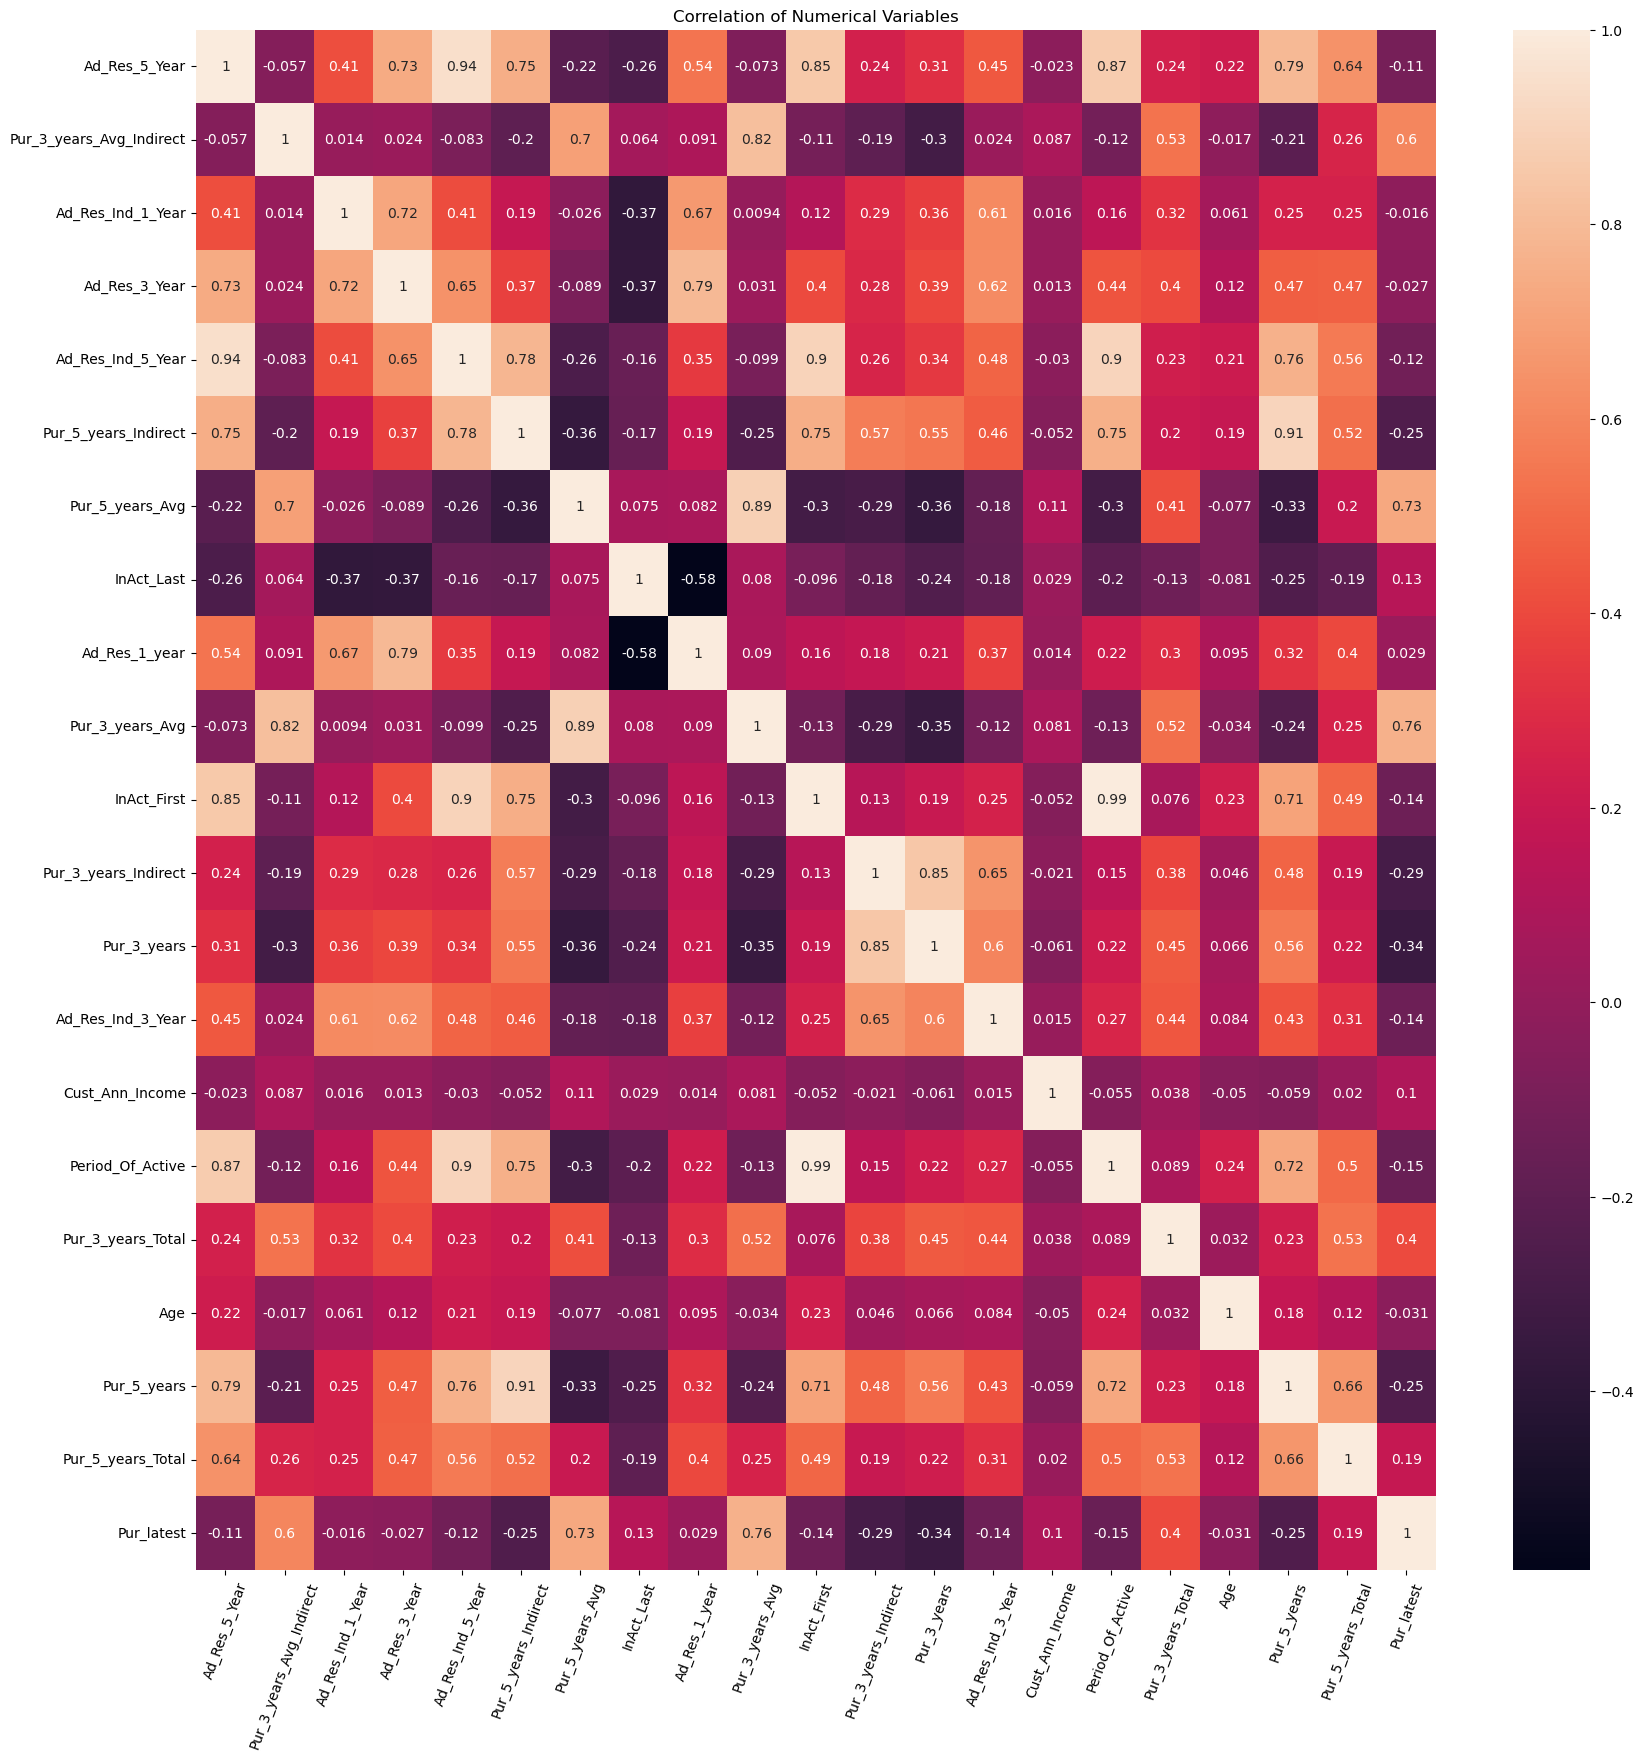

In [56]:
# Draw heatmap for the visualisation

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(Numerical_Correlations, annot = True)
ax.set_title("Correlation of Numerical Variables")
ax.tick_params(axis = 'x', rotation = 70) # Rotate the x-axis title
plt.show()

# 7. Feature Selection

In [57]:
# The high correlation data will be excluded by using the Principle Component Analysis, PCA
# The PCA process will be perform at 8.2 Data Scaling

In [58]:
combined_trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2713 entries, 3151 to 656
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pur_3_years               2713 non-null   float64 
 1   Pur_5_years               2713 non-null   float64 
 2   Pur_3_years_Indirect      2713 non-null   float64 
 3   Pur_5_years_Indirect      2713 non-null   float64 
 4   Pur_latest                2713 non-null   float64 
 5   Pur_3_years_Avg           2713 non-null   float64 
 6   Pur_5_years_Avg           2713 non-null   float64 
 7   Pur_3_years_Avg_Indirect  2713 non-null   float64 
 8   InAct_Last                2713 non-null   float64 
 9   InAct_First               2713 non-null   float64 
 10  Ad_Res_1_year             2713 non-null   float64 
 11  Ad_Res_3_Year             2713 non-null   float64 
 12  Ad_Res_5_Year             2713 non-null   float64 
 13  Ad_Res_Ind_1_Year         2713 non-null   floa

# 8. Data PreProcessing

In [59]:
# X and Y variable

#  Drop this column because we already created new column named Status_Cust_New and Potential_Customer is the target variable
X_train = combined_trainset.drop(['Potential_Customer', 'Status_Cust'], axis = 1)

y_train = combined_trainset['Potential_Customer']


In [60]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 1024 to 3417
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Cust_Last_Purchase        434 non-null    float64 
 1   Pur_3_years               905 non-null    float64 
 2   Pur_5_years               905 non-null    float64 
 3   Pur_3_years_Indirect      905 non-null    float64 
 4   Pur_5_years_Indirect      905 non-null    float64 
 5   Pur_latest                905 non-null    float64 
 6   Pur_3_years_Avg           905 non-null    float64 
 7   Pur_5_years_Avg           905 non-null    float64 
 8   Pur_3_years_Avg_Indirect  763 non-null    float64 
 9   InAct_Last                905 non-null    float64 
 10  InAct_First               905 non-null    float64 
 11  Ad_Res_1_year             905 non-null    float64 
 12  Ad_Res_3_Year             905 non-null    float64 
 13  Ad_Res_5_Year             905 non-null    floa

In [61]:
# Update the X_test base on the modification on X_train
# Update the X_test like we did for train set before

#=======================================================
# Add column Status_Cust_New 
new_dict = {'A':'A','S':'S','E':'Others','F':'Others','N':'Others','L':'Others'}
X_test['Status_Cust_New'] = X_test['Status_Cust'].replace(new_dict)

#==================================================

# Drop old Status_Cust (because we already create new column Status_Cust_New) 
# Drop Cust_Last_Purchase column because missing values more than half
X_test = X_test.drop(['Cust_Last_Purchase', 'Status_Cust'], axis = 1)


# ==================Pur_3_years_Avg_Indirect================
#To align how we handle missing values with X_train
X_test['Pur_3_years_Avg_Indirect']=X_test['Pur_3_years_Avg_Indirect'].fillna(Pur_3_years_Avg_indirect_med)


# =============== AGE==================
# Replace NaN/missing values with 0
X_test['Age'] = X_test['Age'].fillna(0)

# Replace the Age data for those under the age of 18 with the median
X_test.loc[X_test['Age'] < 18,'Age'] = X_test['Age'].median()


# =============  Cust_Ann_Income ===================
X_test['Cust_Ann_Income'] = X_test['Cust_Ann_Income'].replace(0, Cust_Ann_Income_median)



#=================================================

# Creating new columns of Total

# Create new columns for Total Purchase by  multiplying the Purchase by year with Average purchase by year
X_test["Pur_5_years_Total"] = X_test['Pur_5_years'] * X_test['Pur_5_years_Avg']
X_test["Pur_3_years_Total"] = X_test['Pur_3_years'] * X_test['Pur_3_years_Avg']

# Create new column name Period of activity
X_test['Period_Of_Active'] = X_test['InAct_First'] - X_test['InAct_Last']


## 8.1 Dummy Variables

In [62]:
# Change categorical variables to numerical variables ( 0 or 1), using dummy

X_train_dum = pd.get_dummies(X_train, drop_first = True).reset_index(drop = True)
X_test_dum = pd.get_dummies(X_test, drop_first = True).reset_index(drop = True)

In [63]:
X_train_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pur_3_years               2713 non-null   float64
 1   Pur_5_years               2713 non-null   float64
 2   Pur_3_years_Indirect      2713 non-null   float64
 3   Pur_5_years_Indirect      2713 non-null   float64
 4   Pur_latest                2713 non-null   float64
 5   Pur_3_years_Avg           2713 non-null   float64
 6   Pur_5_years_Avg           2713 non-null   float64
 7   Pur_3_years_Avg_Indirect  2713 non-null   float64
 8   InAct_Last                2713 non-null   float64
 9   InAct_First               2713 non-null   float64
 10  Ad_Res_1_year             2713 non-null   float64
 11  Ad_Res_3_Year             2713 non-null   float64
 12  Ad_Res_5_Year             2713 non-null   float64
 13  Ad_Res_Ind_1_Year         2713 non-null   float64
 14  Ad_Res_I

## 8.2 Data Scaling

In [64]:
# Import library
from sklearn.preprocessing import MinMaxScaler

# Use MinMaxScaler because there are many outlier inside the data. Cannot use standardscaler

scaler = MinMaxScaler().fit(X_train_dum)

X_scaled = scaler.transform(X_train_dum) # X_train_scaled
X_testscaled = scaler.transform(X_test_dum)



In [65]:
X_scaled.shape

(2713, 27)

In [66]:
from sklearn.decomposition import PCA

# Reduce the dimensionality from 27 to 10
pca_model = PCA(10, svd_solver = 'randomized').fit(X_scaled)
Xtrain_pca = pca_model.transform(X_scaled)
Xtest_pca = pca_model.transform(X_testscaled)

In [67]:
Xtrain_pca.shape

(2713, 10)

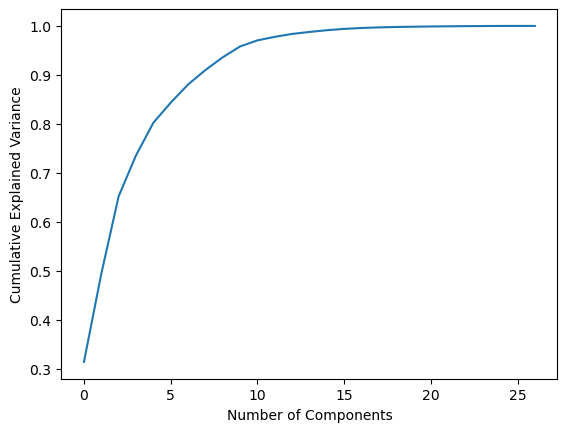

In [68]:
pca =  PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

# Best Number of components is around 10



# 9. Model Creation

In [69]:
# Import libaries for model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [70]:
#KNN
knn_param_grid = {'n_neighbors': np.arange(1, 30),
              'p': [1,2],
              'weights': ['uniform','distance']}

knn_grid = GridSearchCV(KNeighborsClassifier(), 
                    knn_param_grid, scoring='roc_auc',
                    cv=5, return_train_score=True)

knn_grid.fit(X_scaled, y_train)
print("KNN Best Parameter", knn_grid.best_params_)

knn_model = knn_grid.best_estimator_
knn_model.fit(X_scaled,y_train)
print("KNN Best Score", knn_grid.best_score_)

knn_pred=knn_model.predict(X_testscaled)
print("KNN Best Confusion Matrix on test data", confusion_matrix(y_test, knn_pred))
print("****************************************************")

print("KNN Best model precision score on test data = {:.2f}".format(precision_score(y_test,knn_pred)))
print("KNN Best model recall score on test data = {:.2f}".format(recall_score(y_test,knn_pred)))
print("KNN Best model f1 score on test data = {:.2f}".format(f1_score(y_test,knn_pred)))
print("KNN Best model accuracy score on test data = {:.2f}".format(accuracy_score(y_test,knn_pred)))

KNN Best Parameter {'n_neighbors': 28, 'p': 1, 'weights': 'distance'}
KNN Best Score 0.5511421577372284
KNN Best Confusion Matrix on test data [[295 176]
 [226 208]]
****************************************************
KNN Best model precision score on test data = 0.54
KNN Best model recall score on test data = 0.48
KNN Best model f1 score on test data = 0.51
KNN Best model accuracy score on test data = 0.56


In [71]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_param_grid = {'max_depth': np.arange(1,30)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                    dt_param_grid, scoring='roc_auc', cv=5, return_train_score=True)

dt_grid.fit(X_scaled, y_train)
print("Decision Tree best parameters: ",dt_grid.best_params_)
dt_model = dt_grid.best_estimator_
dt_model.fit(X_scaled, y_train)
print("Decision Tree best scores: ",dt_grid.best_score_)


dt_pred = dt_model.predict(X_testscaled)
print("Decision Tree Best model confusion matrix on test data \n", confusion_matrix(y_test, dt_pred))
print("*****************************************")
print("Decision Tree Best model Precision score on test data = {:.2f}".format(precision_score(y_test, dt_pred)))
print("Decision Tree Best model Recall score on test data = {:.2f}".format(recall_score(y_test, dt_pred)))
print("Decision Tree Best model F1 score on test data = {:.2f}".format(f1_score(y_test, dt_pred)))
print("Decision Tree Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, dt_pred)))
print("^_^")


Decision Tree best parameters:  {'max_depth': 3}
Decision Tree best scores:  0.576103780484356
Decision Tree Best model confusion matrix on test data 
 [[353 118]
 [264 170]]
*****************************************
Decision Tree Best model Precision score on test data = 0.59
Decision Tree Best model Recall score on test data = 0.39
Decision Tree Best model F1 score on test data = 0.47
Decision Tree Best model Accuracy score on test data = 0.58
^_^


In [72]:
# LOGISTIC REGRESSION

lr_param_grid = {'fit_intercept': [True,False],
                 'C': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100],
                 'penalty' : ['l1', 'l2']}

logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                    lr_param_grid, scoring='roc_auc', cv=5, return_train_score=True)

logr_grid.fit(X_scaled, y_train)
print("Logistic Regression best parameters: ",logr_grid.best_params_)
logr_model = logr_grid.best_estimator_
logr_model.fit(X_scaled, y_train)

print("Logistic Regression best scores: ",logr_grid.best_score_)


logr_pred = dt_model.predict(X_testscaled)
print("LR Best model confusion matrix on test data \n", confusion_matrix(y_test, dt_pred))
print("*****************************************")
print("LR Best model Precision score on test data = {:.2f}".format(precision_score(y_test, dt_pred)))
print("LR Best model Recall score on test data = {:.2f}".format(recall_score(y_test, dt_pred)))
print("LR Best model F1 score on test data = {:.2f}".format(f1_score(y_test, dt_pred)))
print("LR Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, dt_pred)))
print("^_^")

Logistic Regression best parameters:  {'C': 0.4, 'fit_intercept': False, 'penalty': 'l2'}
Logistic Regression best scores:  0.5908014111497127
LR Best model confusion matrix on test data 
 [[353 118]
 [264 170]]
*****************************************
LR Best model Precision score on test data = 0.59
LR Best model Recall score on test data = 0.39
LR Best model F1 score on test data = 0.47
LR Best model Accuracy score on test data = 0.58
^_^


# 10. Model Evaluation & Comparison

In [73]:
print('classification_report for KNN:\n',classification_report(y_test, knn_pred))
print("######################################################")
print('classification_report for Decision Tree:\n',classification_report(y_test, dt_pred))
print("######################################################")
print('classification_report for Logistic Regression:\n',classification_report(y_test, logr_pred))

classification_report for KNN:
               precision    recall  f1-score   support

           0       0.57      0.63      0.59       471
           1       0.54      0.48      0.51       434

    accuracy                           0.56       905
   macro avg       0.55      0.55      0.55       905
weighted avg       0.55      0.56      0.55       905

######################################################
classification_report for Decision Tree:
               precision    recall  f1-score   support

           0       0.57      0.75      0.65       471
           1       0.59      0.39      0.47       434

    accuracy                           0.58       905
   macro avg       0.58      0.57      0.56       905
weighted avg       0.58      0.58      0.56       905

######################################################
classification_report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.57      0.75      0.65       471
     